In [1]:
import menpo.io as mio
from conversion import landmarkConverter
from setup import process
%matplotlib inline

In [2]:
path_to_images = '/Users/chloehequet/face/demo/'
training_images = mio.import_images(path_to_images, verbose=True)
training_images = training_images.map(process)

Found 20 assets, index the returned LazyList to import.


In [4]:
from menpofit.aam import HolisticAAM
from menpo.feature import fast_dsift
from menpo.shape import TriMesh
import numpy as np

aam = HolisticAAM(training_images, group='landmarks', diagonal=150,
                  scales=(0.5, 1.0), holistic_features=fast_dsift, verbose=True,
                  max_shape_components=20, max_appearance_components=150)

- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (20/20) - done.                    
  - Scale 0: Warping images: [======    ] 65% (13/20) - 00:00:00 remaining      ning

/Users/chloehequet/anaconda2/envs/menpo/lib/python3.5/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


  - Scale 0: Doneding appearance model                                          
  - Scale 1: Doneding appearance model                                          
                                                              

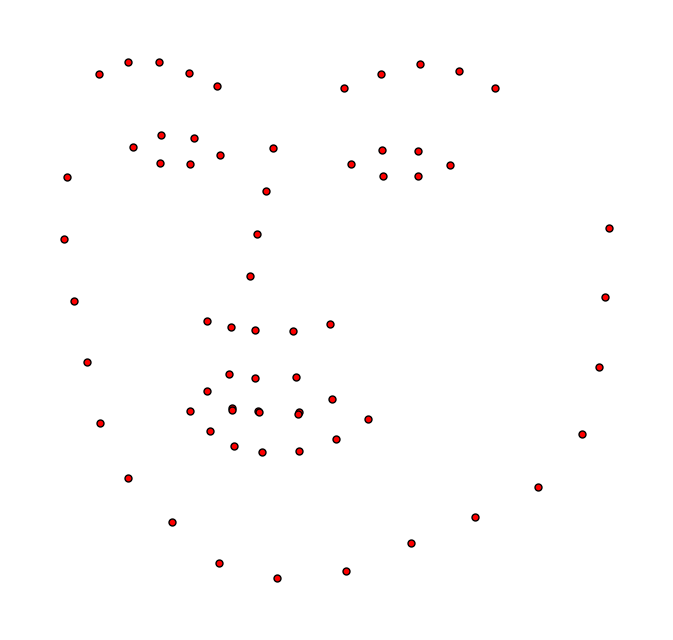

In [6]:
aam.view_appearance_models_widget()
aam.view_shape_models_widget()